In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df = df.iloc[ : , 1 : ]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [8]:
import matplotlib.pyplot as plt

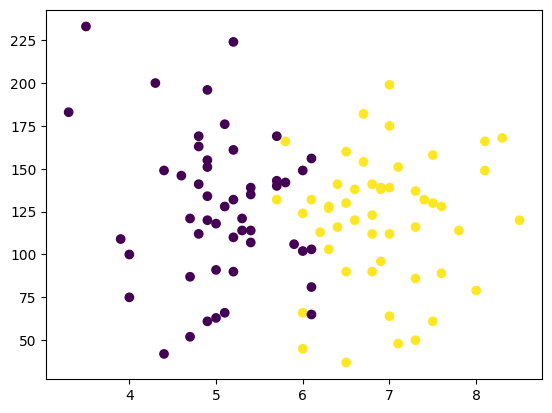

In [9]:
plt.scatter(x = 'cgpa' , y = 'iq' , data = df , c = 'placement')

In [10]:
x = df.iloc[ : , 0 : 2]
y = df.iloc[ : , -1]

In [11]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [22]:
x_train , x_test , y_train , y_test  =  train_test_split(x , y , test_size = 0.1 , random_state = 42)

In [23]:
x_train

,cgpa,iq
18,4.0,100.0
30,7.6,128.0
73,4.9,61.0
33,6.0,149.0
90,7.3,86.0
...,...,...
60,6.9,139.0
71,6.1,132.0
14,6.1,103.0
92,5.2,110.0


In [24]:
x_test

,cgpa,iq
83,7.5,130.0
53,8.3,168.0
70,6.3,127.0
45,6.0,66.0
44,7.5,61.0
39,4.6,146.0
22,4.9,120.0
80,4.9,196.0
10,6.0,45.0
0,6.8,123.0


In [26]:
from sklearn.preprocessing import StandardScaler 

In [27]:
scaler = StandardScaler() 

In [29]:
x_train = scaler.fit_transform(x_train)

In [31]:
x_train

array([[-1.73718527, -0.62029848],
       [ 1.45537303,  0.09806189],
       [-0.9390457 , -1.62087186],
       [ 0.03645823,  0.63683217],
       [ 1.1893265 , -0.97947867],
       [-0.14090612,  0.45724208],
       [-0.9390457 ,  0.79076654],
       [ 1.1893265 , -1.90308486],
       [-0.49563482,  0.3802749 ],
       [-1.82586745, -0.38939693],
       [ 1.63273738, -0.26111829],
       [-1.38245657,  0.63683217],
       [ 0.92327998,  1.91961855],
       [ 1.45537303, -0.90251149],
       [ 2.2535126 , -0.10718393],
       [-0.76168135,  1.32953682],
       [-0.9390457 ,  0.25199626],
       [-1.38245657, -2.10833068],
       [-0.76168135, -1.49259322],
       [ 1.1893265 , -0.20980684],
       [ 0.8345978 ,  0.35461917],
       [-0.67299917,  0.9447009 ],
       [-0.14090612,  1.07297954],
       [-0.67299917, -0.87685576],
       [ 0.74591563, -0.31242975],
       [ 1.01196215, -1.95439632],
       [ 0.8345978 , -0.72292139],
       [ 1.8987839 ,  1.07297954],
       [ 0.74591563,

In [32]:
x_test = scaler.transform(x_test)

In [33]:
x_test

array([[ 1.36669085,  0.14937335],
       [ 2.07614825,  1.124291  ],
       [ 0.30250475,  0.07240616],
       [ 0.03645823, -1.49259322],
       [ 1.36669085, -1.62087186],
       [-1.20509222,  0.55986499],
       [-0.9390457 , -0.10718393],
       [-0.9390457 ,  1.84265137],
       [ 0.03645823, -2.0313635 ],
       [ 0.74591563, -0.03021675]])

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()

In [36]:
# model training
lr.fit(x_train , y_train)

LogisticRegression()

In [37]:
# evaluate the model

In [40]:
y_pred = lr.predict(x_test)

In [41]:
y_test

83    1
53    1
70    1
45    1
44    1
39    0
22    0
80    0
10    1
0     1
Name: placement, dtype: int64

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test , y_pred)

0.8

In [47]:
from mlxtend.plotting import plot_decision_regions 

<Axes: >

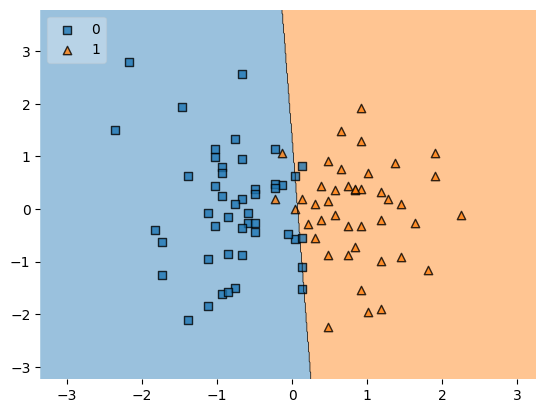

In [49]:
plot_decision_regions(x_train , y_train.values ,clf = lr , legend = 2)

In [50]:
import pickle

In [51]:
pickle.dump(lr , open ('model.pkl' , 'wb'))          